In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


#### checking nulls

In [3]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

no nulls found 

#### checking data types 

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


rank and discipline is object rest is int data type

#### seperating numerical data and categorical data and plotting 

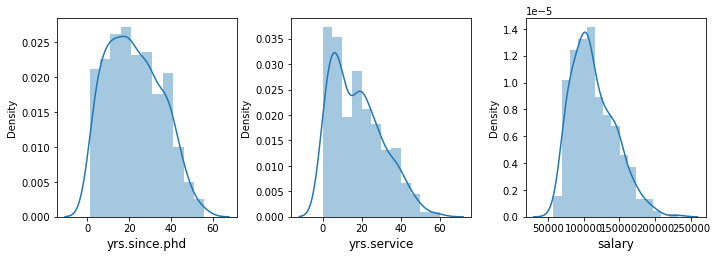

In [5]:
numericalColumns=df.select_dtypes(include=np.number).columns
j=0
plt.figure(figsize=(10,10))
for column in numericalColumns:
    plt.subplot(3,3,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()   

some skewness observed 
yrs. service has two mode

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


B    216
A    181
Name: discipline, dtype: int64


Male      358
Female     39
Name: sex, dtype: int64




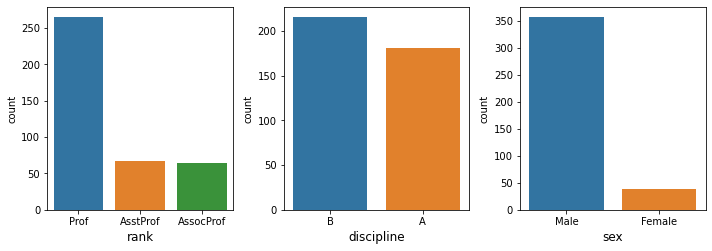

In [6]:
objectColumns=df.select_dtypes(include=np.object).columns
j=0
plt.figure(figsize=(10,10))
for column in objectColumns:
    plt.subplot(3,3,j+1)
    sns.countplot(df[column])
    plt.xlabel(column,fontsize=12)
    print(df[column].value_counts())
    print('\n')
    j+=1
plt.tight_layout() 

in rank prof is dominant 

in discipline A and B almost equal

in sex male data is highly dominant

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yrs.since.phd,397.0,22.314861,12.887003,1.0,12.0,21.0,32.0,56.0
yrs.service,397.0,17.614610,13.006024,0.0,7.0,16.0,27.0,60.0
salary,397.0,113706.458438,30289.038695,57800.0,91000.0,107300.0,134185.0,231545.0


In [8]:
df.describe(include=[object]).T

,count,unique,top,freq
rank,397,3,Prof,266
discipline,397,2,B,216
sex,397,2,Male,358


#### transforming numerical using power transform

In [9]:
df[numericalColumns]

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [10]:
from sklearn.preprocessing import power_transform
A=df[numericalColumns].copy()
A=power_transform(A)
A=pd.DataFrame(A,columns=numericalColumns)
A

,yrs.since.phd,yrs.service,salary
0,-0.127295,0.250619,0.931694
1,-0.049178,0.105112,1.693651
2,-1.628121,-1.288032,-1.254233
3,1.565162,1.416860,0.204998
4,1.279680,1.506524,0.976953
...,...,...,...
392,0.854260,0.976667,-0.217002
393,0.726155,0.320003,1.200766
394,1.395525,0.698789,-0.269388
395,0.320172,0.028567,-0.526982


storing the transformed data in A and later copied to df

In [11]:
df[numericalColumns]=A.copy()
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,-0.127295,0.250619,Male,0.931694
1,Prof,B,-0.049178,0.105112,Male,1.693651
2,AsstProf,B,-1.628121,-1.288032,Male,-1.254233
3,Prof,B,1.565162,1.416860,Male,0.204998
4,Prof,B,1.279680,1.506524,Male,0.976953
...,...,...,...,...,...,...
392,Prof,A,0.854260,0.976667,Male,-0.217002
393,Prof,A,0.726155,0.320003,Male,1.200766
394,Prof,A,1.395525,0.698789,Male,-0.269388
395,Prof,A,0.320172,0.028567,Male,-0.526982


#### Encoding categorical data using ordinal encoder

In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,-0.127295,0.250619,1.0,0.931694
1,2.0,1.0,-0.049178,0.105112,1.0,1.693651
2,1.0,1.0,-1.628121,-1.288032,1.0,-1.254233
3,2.0,1.0,1.565162,1.416860,1.0,0.204998
4,2.0,1.0,1.279680,1.506524,1.0,0.976953
...,...,...,...,...,...,...
392,2.0,0.0,0.854260,0.976667,1.0,-0.217002
393,2.0,0.0,0.726155,0.320003,1.0,1.200766
394,2.0,0.0,1.395525,0.698789,1.0,-0.269388
395,2.0,0.0,0.320172,0.028567,1.0,-0.526982


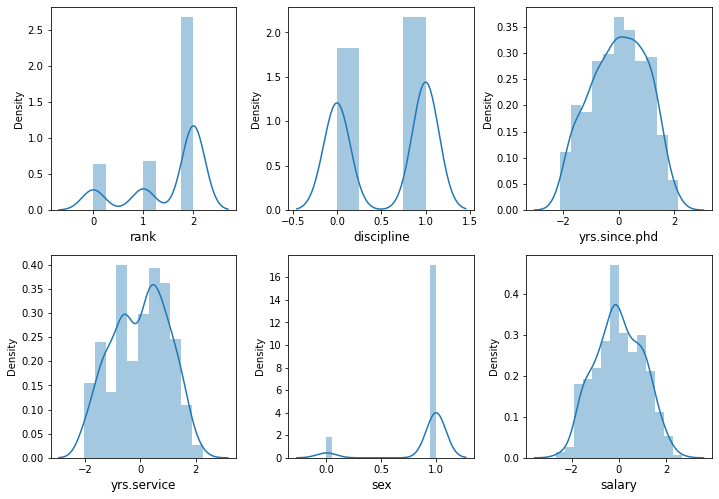

In [14]:
numericalColumns=df.select_dtypes(include=np.number).columns
j=0
plt.figure(figsize=(10,10))
for column in numericalColumns:
    plt.subplot(3,3,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()   

visualising after transformation and encoding

yrs.service has got 2 mode

salary and yrs.since.phd both seems to be normally ditributed

#### check skewness 

In [15]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd   -0.132757
yrs.service     -0.122152
sex             -2.709958
salary           0.012872
dtype: float64

none of the numerical data exceed +0.65 or -0.65 hence no data is removed

#### checking correlation

In [16]:
df.corr()["salary"]

rank             0.548017
discipline       0.177967
yrs.since.phd    0.475993
yrs.service      0.426337
sex              0.149822
salary           1.000000
Name: salary, dtype: float64

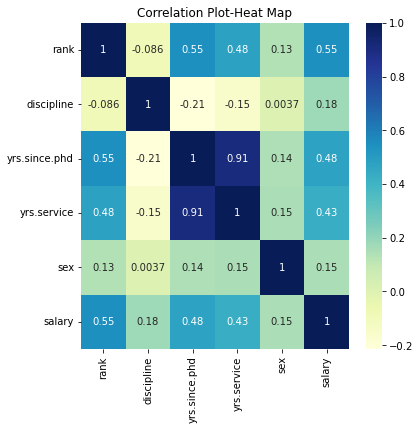

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

checking for multicolinearity problem using vif

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df.drop('salary',axis=1)
t_sa=sc.fit_transform(df)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(t_sa, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif

,vif,features
0,1.705076,rank
1,1.199288,discipline
2,6.822042,yrs.since.phd
3,5.859768,yrs.service
4,1.033231,sex


no value is greater than 10 and in heat map yrs.since.phd and yrs.serviceshowed high correlation but in vif it doesnt cross limit hence not dropped 

#### Removing outliers using z score 

In [19]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  9.82367758186398  %


#### Randomizing data as ordered data can cause poor performance 

In [20]:
df_x = df_x.sample(frac=1)
df_x

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
93,2.0,1.0,1.161454,1.371039,1.0,1.546470
163,1.0,1.0,-1.775305,-1.288032,1.0,-0.760673
219,2.0,1.0,-0.635594,-0.309681,1.0,0.350779
6,2.0,1.0,0.660852,0.578854,1.0,1.729388
243,2.0,0.0,0.176334,0.578854,1.0,-0.029246
...,...,...,...,...,...,...
344,2.0,1.0,0.790612,1.229280,1.0,1.196295
280,2.0,0.0,1.220875,1.371039,1.0,0.845749
135,2.0,0.0,-0.049178,0.250619,1.0,0.832302
67,2.0,1.0,0.979259,1.029007,1.0,-0.360255


#### split data set

In [21]:
X=df_x.drop('salary',axis=1)
Y=df_x['salary']

# Trying differnent algorithm

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
A=[]
B=[]
C=[]
D=[]

A is used to store test accuracy

B is used to store cv mean

C is used to store mean squared error

D is used to store difference between test accuracy and cv score

In [23]:
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=(r2_score(y_test,y_pred))*100
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state



maxr2_score function is used to find the best random state where r2 score is maximum

In [24]:
def te_t(regr,x_train,x_test,y_train,y_test,R):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(r2_score(y_test,y_te)*100,1)}")
    A.append(round(r2_score(y_test,y_te)*100,1))
    print(f"train accuracy is {round(r2_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))

based on random state test accuracy, train accuracy and mse is calculated

In [25]:
def score(regr,x_train,x_test,y_train,y_test,R):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(r2_score(y_train,y_tr)*100,1)
    te_ac=round(r2_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

the best cv score and where it is found is noted, and least difference between cv score and test accuracy is noted

In [28]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor()
R=maxr2_score(reg,X,Y)

r2 score corresponding to  0  is  -39.53022705104181
r2 score corresponding to  1  is  -17.521968898566655
r2 score corresponding to  2  is  6.336870425940278
r2 score corresponding to  3  is  38.46800673803523
r2 score corresponding to  4  is  12.06119647527143
r2 score corresponding to  5  is  7.458943645879446
r2 score corresponding to  6  is  10.78575313860105
r2 score corresponding to  7  is  -0.1578524592820596
r2 score corresponding to  8  is  -11.360619998145726
r2 score corresponding to  9  is  17.946092388555822
r2 score corresponding to  10  is  -7.457821491181815
r2 score corresponding to  11  is  15.112982277620013
r2 score corresponding to  12  is  19.910710976505065
r2 score corresponding to  13  is  -0.05311185590173295
r2 score corresponding to  14  is  -50.608122121778074
r2 score corresponding to  15  is  20.22990822850924
r2 score corresponding to  16  is  16.709373934196147
r2 score corresponding to  17  is  -18.154582140724695
r2 score corresponding to  18  is  13

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x_train,x_test,y_train,y_test,R)

test accuracy is 52.1
train accuracy is 94.4


In [30]:
score(reg,x_train,x_test,y_train,y_test,R)

At cv is 2 cv score is -3.47  
 test accuracy is 52.1 

At cv is 3 cv score is -0.16  
 test accuracy is 52.1 

At cv is 4 cv score is 1.16  
 test accuracy is 52.1 

At cv is 5 cv score is 0.26  
 test accuracy is 52.1 

At cv is 6 cv score is -2.62  
 test accuracy is 52.1 

At cv is 7 cv score is 2.49  
 test accuracy is 52.1 

At cv is 8 cv score is 11.28  
 test accuracy is 52.1 

At cv is 9 cv score is 0.88  
 test accuracy is 52.1 

At cv is 10 cv score is -7.0  
 test accuracy is 52.1 

At cv is 11 cv score is 5.28  
 test accuracy is 52.1 

At cv is 12 cv score is 0.92  
 test accuracy is 52.1 

At cv is 13 cv score is 10.11  
 test accuracy is 52.1 

At cv is 14 cv score is 6.63  
 test accuracy is 52.1 

At cv is 15 cv score is 3.64  
 test accuracy is 52.1 

At cv is 16 cv score is 6.61  
 test accuracy is 52.1 

At cv is 17 cv score is 10.59  
 test accuracy is 52.1 

At cv is 18 cv score is -1.45  
 test accuracy is 52.1 

At cv is 19 cv score is 4.76  
 test accuracy is 

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor()
R=maxr2_score(rf_reg,X,Y)

r2 score corresponding to  0  is  -8.292399299419607
r2 score corresponding to  1  is  31.568595198002715
r2 score corresponding to  2  is  32.97099232452937
r2 score corresponding to  3  is  55.04137711204784
r2 score corresponding to  4  is  32.837305438758044
r2 score corresponding to  5  is  57.92612497126163
r2 score corresponding to  6  is  44.81668501003975
r2 score corresponding to  7  is  43.94698257615257
r2 score corresponding to  8  is  34.25830135848281
r2 score corresponding to  9  is  44.69343384537224
r2 score corresponding to  10  is  25.9790247101363
r2 score corresponding to  11  is  40.751986688702225
r2 score corresponding to  12  is  39.04877003545772
r2 score corresponding to  13  is  36.55420332546796
r2 score corresponding to  14  is  36.97223940460862
r2 score corresponding to  15  is  48.87329140554672
r2 score corresponding to  16  is  52.29443484738234
r2 score corresponding to  17  is  36.61651962282079
r2 score corresponding to  18  is  45.00428241023104


In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_reg,x_train,x_test,y_train,y_test,R)

test accuracy is 61.3
train accuracy is 87.4


In [33]:
score(rf_reg,x_train,x_test,y_train,y_test,R)

At cv is 2 cv score is 39.71  
 test accuracy is 61.3 

At cv is 3 cv score is 35.45  
 test accuracy is 61.3 

At cv is 4 cv score is 39.63  
 test accuracy is 61.3 

At cv is 5 cv score is 40.28  
 test accuracy is 61.3 

At cv is 6 cv score is 35.96  
 test accuracy is 61.3 

At cv is 7 cv score is 37.98  
 test accuracy is 61.3 

At cv is 8 cv score is 40.04  
 test accuracy is 61.3 

At cv is 9 cv score is 38.7  
 test accuracy is 61.3 

At cv is 10 cv score is 38.67  
 test accuracy is 61.3 

At cv is 11 cv score is 38.1  
 test accuracy is 61.3 

At cv is 12 cv score is 37.02  
 test accuracy is 61.3 

At cv is 13 cv score is 38.93  
 test accuracy is 61.3 

At cv is 14 cv score is 39.29  
 test accuracy is 61.3 

At cv is 15 cv score is 37.91  
 test accuracy is 61.3 

At cv is 16 cv score is 38.91  
 test accuracy is 61.3 

At cv is 17 cv score is 39.87  
 test accuracy is 61.3 

At cv is 18 cv score is 35.96  
 test accuracy is 61.3 

At cv is 19 cv score is 37.01  
 test acc

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knr = KNeighborsRegressor()
R=maxr2_score(knr,X,Y)

r2 score corresponding to  0  is  13.452037759485691
r2 score corresponding to  1  is  47.09854488672689
r2 score corresponding to  2  is  50.27724327701109
r2 score corresponding to  3  is  50.446751100601574
r2 score corresponding to  4  is  43.88571631772906
r2 score corresponding to  5  is  58.2608961823764
r2 score corresponding to  6  is  57.586620099538756
r2 score corresponding to  7  is  49.16073254285268
r2 score corresponding to  8  is  51.68015538013496
r2 score corresponding to  9  is  46.73968869232347
r2 score corresponding to  10  is  36.14249710356942
r2 score corresponding to  11  is  51.35633347036857
r2 score corresponding to  12  is  44.425605490309565
r2 score corresponding to  13  is  51.514456344695944
r2 score corresponding to  14  is  45.436699005703375
r2 score corresponding to  15  is  51.641050461458704
r2 score corresponding to  16  is  51.97693635611069
r2 score corresponding to  17  is  40.01160004401989
r2 score corresponding to  18  is  54.723950224286

In [35]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(knr,x_train,x_test,y_train,y_test,R)

test accuracy is 58.6
train accuracy is 64.9


In [36]:
score(knr,x_train,x_test,y_train,y_test,R)

At cv is 2 cv score is 48.2  
 test accuracy is 58.6 

At cv is 3 cv score is 47.55  
 test accuracy is 58.6 

At cv is 4 cv score is 45.41  
 test accuracy is 58.6 

At cv is 5 cv score is 48.42  
 test accuracy is 58.6 

At cv is 6 cv score is 45.8  
 test accuracy is 58.6 

At cv is 7 cv score is 45.55  
 test accuracy is 58.6 

At cv is 8 cv score is 45.06  
 test accuracy is 58.6 

At cv is 9 cv score is 47.82  
 test accuracy is 58.6 

At cv is 10 cv score is 48.05  
 test accuracy is 58.6 

At cv is 11 cv score is 46.7  
 test accuracy is 58.6 

At cv is 12 cv score is 45.97  
 test accuracy is 58.6 

At cv is 13 cv score is 46.81  
 test accuracy is 58.6 

At cv is 14 cv score is 48.07  
 test accuracy is 58.6 

At cv is 15 cv score is 47.88  
 test accuracy is 58.6 

At cv is 16 cv score is 47.7  
 test accuracy is 58.6 

At cv is 17 cv score is 47.64  
 test accuracy is 58.6 

At cv is 18 cv score is 46.25  
 test accuracy is 58.6 

At cv is 19 cv score is 45.84  
 test accur

In [37]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
R=maxr2_score(lnr,X,Y)

r2 score corresponding to  0  is  23.694684542548437
r2 score corresponding to  1  is  44.5703159455318
r2 score corresponding to  2  is  28.301165105293215
r2 score corresponding to  3  is  40.522068602339225
r2 score corresponding to  4  is  36.544409239269186
r2 score corresponding to  5  is  41.468123005919054
r2 score corresponding to  6  is  42.511471466350315
r2 score corresponding to  7  is  42.51664423948108
r2 score corresponding to  8  is  33.91829959638638
r2 score corresponding to  9  is  26.603264241812152
r2 score corresponding to  10  is  15.524432755744144
r2 score corresponding to  11  is  35.882828637704534
r2 score corresponding to  12  is  31.75499319370093
r2 score corresponding to  13  is  25.53223653198836
r2 score corresponding to  14  is  37.01763497954348
r2 score corresponding to  15  is  37.069495239499595
r2 score corresponding to  16  is  46.049527993887054
r2 score corresponding to  17  is  22.502748992062237
r2 score corresponding to  18  is  36.5274596

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(lnr,x_train,x_test,y_train,y_test,R)

test accuracy is 49.5
train accuracy is 34.8


In [39]:
score(lnr,x_train,x_test,y_train,y_test,R)

At cv is 2 cv score is 36.34  
 test accuracy is 49.5 

At cv is 3 cv score is 37.02  
 test accuracy is 49.5 

At cv is 4 cv score is 36.33  
 test accuracy is 49.5 

At cv is 5 cv score is 37.08  
 test accuracy is 49.5 

At cv is 6 cv score is 34.71  
 test accuracy is 49.5 

At cv is 7 cv score is 36.16  
 test accuracy is 49.5 

At cv is 8 cv score is 35.18  
 test accuracy is 49.5 

At cv is 9 cv score is 36.61  
 test accuracy is 49.5 

At cv is 10 cv score is 35.5  
 test accuracy is 49.5 

At cv is 11 cv score is 34.64  
 test accuracy is 49.5 

At cv is 12 cv score is 34.87  
 test accuracy is 49.5 

At cv is 13 cv score is 36.18  
 test accuracy is 49.5 

At cv is 14 cv score is 35.81  
 test accuracy is 49.5 

At cv is 15 cv score is 35.44  
 test accuracy is 49.5 

At cv is 16 cv score is 36.15  
 test accuracy is 49.5 

At cv is 17 cv score is 34.78  
 test accuracy is 49.5 

At cv is 18 cv score is 32.94  
 test accuracy is 49.5 

At cv is 19 cv score is 33.33  
 test ac

In [40]:
from sklearn.ensemble import AdaBoostRegressor
adboost_reg= AdaBoostRegressor()
R=maxr2_score(adboost_reg,X,Y)

r2 score corresponding to  0  is  2.4033786256833167
r2 score corresponding to  1  is  28.920527458422075
r2 score corresponding to  2  is  38.6160944454688
r2 score corresponding to  3  is  58.210090827679785
r2 score corresponding to  4  is  40.006414586702654
r2 score corresponding to  5  is  35.23284236199162
r2 score corresponding to  6  is  51.02546636060408
r2 score corresponding to  7  is  38.14874415091069
r2 score corresponding to  8  is  16.46457327076336
r2 score corresponding to  9  is  41.890700037290344
r2 score corresponding to  10  is  30.444696772896883
r2 score corresponding to  11  is  42.48852387189813
r2 score corresponding to  12  is  46.21785039087462
r2 score corresponding to  13  is  50.91170715091371
r2 score corresponding to  14  is  30.728180405049876
r2 score corresponding to  15  is  52.75333852621033
r2 score corresponding to  16  is  54.93969917529162
r2 score corresponding to  17  is  45.39760088587872
r2 score corresponding to  18  is  56.024796334207

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_reg,x_train,x_test,y_train,y_test,R)
print('\n')
score(adboost_reg,x_train,x_test,y_train,y_test,R)

test accuracy is 59.8
train accuracy is 56.0


At cv is 2 cv score is 33.23  
 test accuracy is 59.8 

At cv is 3 cv score is 40.54  
 test accuracy is 59.8 

At cv is 4 cv score is 42.36  
 test accuracy is 59.8 

At cv is 5 cv score is 41.54  
 test accuracy is 59.8 

At cv is 6 cv score is 38.49  
 test accuracy is 59.8 

At cv is 7 cv score is 38.72  
 test accuracy is 59.8 

At cv is 8 cv score is 39.23  
 test accuracy is 59.8 

At cv is 9 cv score is 42.36  
 test accuracy is 59.8 

At cv is 10 cv score is 37.86  
 test accuracy is 59.8 

At cv is 11 cv score is 38.15  
 test accuracy is 59.8 

At cv is 12 cv score is 41.66  
 test accuracy is 59.8 

At cv is 13 cv score is 38.81  
 test accuracy is 59.8 

At cv is 14 cv score is 38.6  
 test accuracy is 59.8 

At cv is 15 cv score is 40.66  
 test accuracy is 59.8 

At cv is 16 cv score is 40.45  
 test accuracy is 59.8 

At cv is 17 cv score is 39.67  
 test accuracy is 59.8 

At cv is 18 cv score is 35.98  
 test accuracy is 

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg=GradientBoostingRegressor()
R=maxr2_score(grad_reg,X,Y)

r2 score corresponding to  0  is  -34.026426183538995
r2 score corresponding to  1  is  24.1152618407123
r2 score corresponding to  2  is  30.284601388616995
r2 score corresponding to  3  is  62.39997720261774
r2 score corresponding to  4  is  28.820957280722727
r2 score corresponding to  5  is  41.586180807712594
r2 score corresponding to  6  is  42.38734682812115
r2 score corresponding to  7  is  41.62580768141636
r2 score corresponding to  8  is  14.962684154383144
r2 score corresponding to  9  is  41.613336837719984
r2 score corresponding to  10  is  39.01804149706108
r2 score corresponding to  11  is  42.21781381919584
r2 score corresponding to  12  is  46.98638716176917
r2 score corresponding to  13  is  38.568325711639254
r2 score corresponding to  14  is  27.913518698134254
r2 score corresponding to  15  is  53.651210583257836
r2 score corresponding to  16  is  52.90772665629523
r2 score corresponding to  17  is  33.48750213587866
r2 score corresponding to  18  is  52.371290793

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_reg,x_train,x_test,y_train,y_test,R)
print('\n')
score(grad_reg,x_train,x_test,y_train,y_test,R)

test accuracy is 62.4
train accuracy is 76.4


At cv is 2 cv score is 35.87  
 test accuracy is 62.4 

At cv is 3 cv score is 33.89  
 test accuracy is 62.4 

At cv is 4 cv score is 35.21  
 test accuracy is 62.4 

At cv is 5 cv score is 33.46  
 test accuracy is 62.4 

At cv is 6 cv score is 37.55  
 test accuracy is 62.4 

At cv is 7 cv score is 37.76  
 test accuracy is 62.4 

At cv is 8 cv score is 39.68  
 test accuracy is 62.4 

At cv is 9 cv score is 40.44  
 test accuracy is 62.4 

At cv is 10 cv score is 37.63  
 test accuracy is 62.4 

At cv is 11 cv score is 37.21  
 test accuracy is 62.4 

At cv is 12 cv score is 37.98  
 test accuracy is 62.4 

At cv is 13 cv score is 41.4  
 test accuracy is 62.4 

At cv is 14 cv score is 39.82  
 test accuracy is 62.4 

At cv is 15 cv score is 38.44  
 test accuracy is 62.4 

At cv is 16 cv score is 40.94  
 test accuracy is 62.4 

At cv is 17 cv score is 39.95  
 test accuracy is 62.4 

At cv is 18 cv score is 37.24  
 test accuracy is 

In [44]:
from sklearn.svm import SVR
svr_reg=SVR()
R=maxr2_score(svr_reg,X,Y)

r2 score corresponding to  0  is  27.879679396843613
r2 score corresponding to  1  is  48.72691287869016
r2 score corresponding to  2  is  41.44397494552203
r2 score corresponding to  3  is  59.319550855771496
r2 score corresponding to  4  is  49.606940537239794
r2 score corresponding to  5  is  55.53378954564578
r2 score corresponding to  6  is  58.67742891712323
r2 score corresponding to  7  is  59.973611945070694
r2 score corresponding to  8  is  42.539642446616725
r2 score corresponding to  9  is  50.796953032064195
r2 score corresponding to  10  is  27.546690543763418
r2 score corresponding to  11  is  55.31107178555228
r2 score corresponding to  12  is  49.19918080422203
r2 score corresponding to  13  is  48.050245447478545
r2 score corresponding to  14  is  40.734829701042294
r2 score corresponding to  15  is  57.33506451659993
r2 score corresponding to  16  is  56.37277863021317
r2 score corresponding to  17  is  46.673773257786635
r2 score corresponding to  18  is  57.27827988

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(svr_reg,x_train,x_test,y_train,y_test,R)
print('\n')
score(svr_reg,x_train,x_test,y_train,y_test,R)

test accuracy is 63.4
train accuracy is 51.1


At cv is 2 cv score is 49.31  
 test accuracy is 63.4 

At cv is 3 cv score is 49.78  
 test accuracy is 63.4 

At cv is 4 cv score is 49.03  
 test accuracy is 63.4 

At cv is 5 cv score is 48.68  
 test accuracy is 63.4 

At cv is 6 cv score is 49.23  
 test accuracy is 63.4 

At cv is 7 cv score is 49.61  
 test accuracy is 63.4 

At cv is 8 cv score is 49.58  
 test accuracy is 63.4 

At cv is 9 cv score is 50.48  
 test accuracy is 63.4 

At cv is 10 cv score is 50.76  
 test accuracy is 63.4 

At cv is 11 cv score is 49.67  
 test accuracy is 63.4 

At cv is 12 cv score is 49.88  
 test accuracy is 63.4 

At cv is 13 cv score is 50.73  
 test accuracy is 63.4 

At cv is 14 cv score is 51.41  
 test accuracy is 63.4 

At cv is 15 cv score is 49.95  
 test accuracy is 63.4 

At cv is 16 cv score is 50.57  
 test accuracy is 63.4 

At cv is 17 cv score is 51.02  
 test accuracy is 63.4 

At cv is 18 cv score is 48.28  
 test accuracy is

#### Inference

In [46]:
L=['DT','RF','KNN','LR','ADA','GRAD','SVR']

In [47]:
E=pd.DataFrame({'test accuracy':A,'cv_score': B,'diff':D,'mse':C},index=L)
E

,test accuracy,cv_score,diff,mse
DT,52.1,11.284595,40.815405,0.505269
RF,61.3,40.275106,21.024894,0.417593
KNN,58.6,48.419117,10.180883,0.445744
LR,49.5,37.083939,12.416061,0.524092
ADA,59.8,42.360986,17.439014,0.399392
GRAD,62.4,41.404856,20.995144,0.314546
SVR,63.4,51.406042,11.993958,0.446880


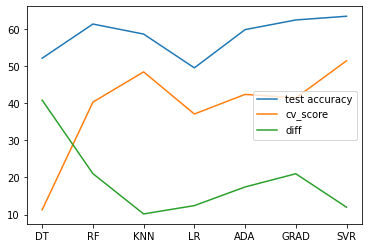

In [48]:
E[['test accuracy','cv_score','diff']].plot()
plt.show()

from table and graph the best model is knn  as it has second highest test accuracy and highest cv score and the least difference between the cv score and test accuracy

#### Hyper paramter tuning

In [49]:
from sklearn.model_selection import GridSearchCV

In [51]:
par={'C':[1,5,10,20],
       'gamma':[0.001,0.01,0.02,0.002]
            
}

In [52]:
grid=GridSearchCV(svr_reg,par,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 20, 'gamma': 0.02}

In [56]:
svr=SVR(C= 20, gamma= 0.02)
svr.fit(x_train,y_train)
y_te=svr.predict(x_test)
r2=round(r2_score(y_test,y_te)*100,1)
print(r2)

59.1


In [58]:
cv_score=cross_val_score(svr,X,Y,cv=14)
cv_mean=cv_score.mean()*100
print(cv_mean)

48.89999058250871


#### storing and loading it for later use 

In [59]:
import pickle

In [60]:
filename='sal.pkl'
pickle.dump(svr,open(filename,'wb'))

In [61]:
l_m=pickle.load(open('sal.pkl','rb'))
re=l_m.score(x_test,y_test)
print(re*100)

59.089056464639626


In [298]:
# i dont know how to scale particular data i want once user enter to predict data after load as i scaled only a few column and not all
# dont know what to do with cv score loop except that i know that a particular split gives me high cv_score 
# after trying multiple transformation i couldnt get the best transformation method for converting numerical data
# how to autmoatically feed paramter once tuning is done
#in case the model selected is in the middle algorithm during hyper paramter tuning should i do train test plit agian or save each algorithms test train and use it 